In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mydataraw = pd.read_csv("oilpriceindex.csv")

In [3]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values=["null"], index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [4]:
mydatats= mydatats.fillna(method="bfill")

In [5]:
mydatats.isna().sum()

WTI      0
BRENT    0
INR      0
NIFTY    0
dtype: int64

In [6]:
pip install arch

     |████████████████████████████████| 808kB 4.8MB/s 


In [8]:
from arch import  arch_model

In [9]:
mydatats["WTI_PCT"]= mydatats.WTI.pct_change(1)*100
mydatats["WTI_sqr"]= mydatats.WTI_PCT.mul(mydatats.WTI_PCT)

In [10]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WTI_PCT,WTI_sqr
DATE,,,,,,
1990-01-01,22.86,21.25,16.880,0.44,NaN,NaN
1990-02-01,22.11,19.81,16.960,2.45,-3.280840,10.763910
1990-03-01,18.43,18.39,17.300,-0.28,-16.644052,277.024482
1990-04-01,18.43,16.61,17.300,-6.18,0.000000,0.000000
1990-05-01,18.20,16.35,17.378,-1.62,-1.247965,1.557417


In [11]:
model_arch1 = arch_model(mydatats.WTI_PCT[1:])
estimates_arch1 = model_arch1.fit(update_freq= 7)
print(estimates_arch1.summary())

Iteration:      7,   Func. Count:     48,   Neg. LLF: 1306.3797916933079
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1306.3797877475527
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_PCT   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1306.38
Distribution:                  Normal   AIC:                           2620.76
Method:            Maximum Likelihood   BIC:                           2636.47
                                        No. Observations:                  375
Date:                Sat, Jul 03 2021   Df Residuals:                      374
Time:                        05:19:26   Df Model:                            1
       

**Simple ARCH(1)**

**Constant Mean**

In [18]:
model_arch1 = arch_model(mydatats.WTI_PCT[1:], mean= "constant", vol="ARCH", p = 1)
estimates_arch1 = model_arch1.fit(update_freq= 4)
print(estimates_arch1.summary())

Iteration:      4,   Func. Count:     24,   Neg. LLF: 1315.3454292119245
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1315.2964907824723
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1315.2954492327399
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                WTI_PCT   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1315.30
Distribution:                  Normal   AIC:                           2636.59
Method:            Maximum Likelihood   BIC:                           2648.37
                                        No. Observations:                  375
Date:                Sat, Jul 03 2021   Df Residuals:                      374
Time:      

Alpha = 0.2780 = Impact of past error square 



Beta =  Persistence (A +B <=1)

In [13]:
model_arch1 = arch_model(mydatats.WTI_PCT[1:], mean= "zero", vol="ARCH", p = 1)
estimates_arch1 = model_arch1.fit(update_freq= 4)
print(estimates_arch1.summary())

Iteration:      4,   Func. Count:     19,   Neg. LLF: 1317.5880973740636
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1317.5876495217628
            Iterations: 6
            Function evaluations: 27
            Gradient evaluations: 6
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                WTI_PCT   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:               -1317.59
Distribution:                  Normal   AIC:                           2639.18
Method:            Maximum Likelihood   BIC:                           2647.03
                                        No. Observations:                  375
Date:                Sat, Jul 03 2021   Df Residuals:                      375
Time:                        05:20:08   Df Model:                            0
       

In [14]:
model_garch_1_1 = arch_model(mydatats.WTI_PCT[1:], mean= "zero", vol="GARCH", p = 1, q = 1)
estimates_arch1 = model_garch_1_1.fit(update_freq= 4)
print(estimates_arch1.summary())

Iteration:      4,   Func. Count:     25,   Neg. LLF: 1307.8048202555992
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1307.7957893936746
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                WTI_PCT   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                      GARCH   Log-Likelihood:               -1307.80
Distribution:                  Normal   AIC:                           2621.59
Method:            Maximum Likelihood   BIC:                           2633.37
                                        No. Observations:                  375
Date:                Sat, Jul 03 2021   Df Residuals:                      375
Time:                        05:20:24   Df Model:                            0
       

**Multivariate Time Series Analysis**

**Testing of Causality** 

In [16]:
mydata = pd.read_csv("stockmarketindex.csv", na_values=["null"], index_col="Date", parse_dates=True, infer_datetime_format=True)

In [19]:
mydata.head()

,asi,his,nky,sti,sensex
Date,,,,,
15-05-2009,4075.65,2019.66,136.57,1540.10,224.85
16-05-2009,3955.57,1994.27,141.07,1539.52,223.01
17-05-2009,3961.92,2002.47,141.65,1546.77,222.40
18-05-2009,3935.97,2000.80,143.67,1541.34,220.43
19-05-2009,3892.94,2001.04,140.71,1541.21,225.57


In [20]:
mydatadiff = mydata.diff().dropna()

In [21]:
mydatadiff.head()

,asi,his,nky,sti,sensex
Date,,,,,
16-05-2009,-120.08,-25.39,4.50,-0.58,-1.84
17-05-2009,6.35,8.20,0.58,7.25,-0.61
18-05-2009,-25.95,-1.67,2.02,-5.43,-1.97
19-05-2009,-43.03,0.24,-2.96,-0.13,5.14
22-05-2009,-59.59,29.87,2.75,-1.55,2.48


**Granger Causality**

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

 ASIt = HISt-i and ASIt-i

  HISt = HISt-i and ASIt-i

Ho: ASI does not cause HIS
H1: ASO does cause HIS

If Prob. value of F Test is < 0.01, then reject the Null(Ho) at 1% level

If Prob. value of F Test is < 0.05, then reject the Null(Ho) at 5% level

If Prob. value of F Test is < 0.1, then reject the Null(Ho) at 10% level


Does 

In [23]:
print(grangercausalitytests(mydatadiff[["asi", "his"]], maxlag=4, addconst=True, verbose= True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.9527  , p=0.3290  , df=1
likelihood ratio test: chi2=0.9525  , p=0.3291  , df=1
parameter F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.9979  , p=0.6072  , df=2
likelihood ratio test: chi2=0.9978  , p=0.6072  , df=2
parameter F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=3.7794  , p=0.2863  , df=3
likelihood ratio test: chi2=3.7769  , p=0.2866  , df=3
parameter F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9918  , p=0.

If Prob. value of F Test is < 0.01, then reject the Null(Ho) at 1% level

If Prob. value of F Test is < 0.05, then reject the Null(Ho) at 5% level

If Prob. value of F Test is < 0.1, then reject the Null(Ho) at 10% level

Y = HIS (Dependent)      X = ASI (Independent)  
HIS = f(ASI)

Null Hyp: ASI does not granger Cause HIS

Alt Hyp: ASI does granger Cause HIS


In [24]:
print(grangercausalitytests(mydatadiff[["his", "asi"]], maxlag=4, addconst=True, verbose= True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8921  , p=0.0891  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=2.8952  , p=0.0888  , df=1
likelihood ratio test: chi2=2.8937  , p=0.0889  , df=1
parameter F test:         F=2.8921  , p=0.0891  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2738  , p=0.0380  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=6.5591  , p=0.0376  , df=2
likelihood ratio test: chi2=6.5516  , p=0.0378  , df=2
parameter F test:         F=3.2738  , p=0.0380  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1692  , p=0.0896  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=6.5237  , p=0.0887  , df=3
likelihood ratio test: chi2=6.5162  , p=0.0890  , df=3
parameter F test:         F=2.1692  , p=0.0896  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9243  , p=0.

In [25]:
print(grangercausalitytests(mydatadiff[[ "asi", "nky"]], maxlag=4, addconst=True, verbose= True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1528  , p=0.6959  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.1529  , p=0.6957  , df=1
likelihood ratio test: chi2=0.1529  , p=0.6957  , df=1
parameter F test:         F=0.1528  , p=0.6959  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2429  , p=0.7844  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.4866  , p=0.7840  , df=2
likelihood ratio test: chi2=0.4866  , p=0.7840  , df=2
parameter F test:         F=0.2429  , p=0.7844  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1853  , p=0.9065  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=0.5572  , p=0.9062  , df=3
likelihood ratio test: chi2=0.5572  , p=0.9062  , df=3
parameter F test:         F=0.1853  , p=0.9065  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6359  , p=0.

In [26]:
print(grangercausalitytests(mydatadiff[[  "nky", "asi"]], maxlag=4, addconst=True, verbose= True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1570  , p=0.0416  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=4.1614  , p=0.0414  , df=1
likelihood ratio test: chi2=4.1583  , p=0.0414  , df=1
parameter F test:         F=4.1570  , p=0.0416  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2200  , p=0.1088  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=4.4479  , p=0.1082  , df=2
likelihood ratio test: chi2=4.4444  , p=0.1084  , df=2
parameter F test:         F=2.2200  , p=0.1088  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1643  , p=0.0902  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=6.5090  , p=0.0893  , df=3
likelihood ratio test: chi2=6.5016  , p=0.0896  , df=3
parameter F test:         F=2.1643  , p=0.0902  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1987  , p=0.

**Vector Autoregression Model (VAR)**

In [27]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [28]:
varmodel= VAR(mydatadiff)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


**Selection of Optimul Lags**

In [41]:
optlag_var = varmodel.select_order(12)

In [31]:
optlag_var.summary()

,AIC,BIC,FPE,HQIC
0,26.90,26.91,4.794e+11,26.90
1,26.84,26.90*,4.524e+11,26.86*
2,26.84,26.96,4.539e+11,26.88
3,26.83,27.00,4.502e+11,26.89
4,26.83,27.05,4.473e+11,26.91
5,26.82,27.10,4.451e+11,26.92
6,26.83,27.16,4.484e+11,26.95
7,26.82*,27.20,4.451e+11*,26.96
8,26.83,27.26,4.482e+11,26.98
9,26.84,27.32,4.520e+11,27.01


**Fit the VAR Model**

In [32]:
varresult = varmodel.fit(maxlags=12, ic = "aic")
varresult.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Jul, 2021
Time:                     06:59:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    27.1991
Nobs:                     2831.00    HQIC:                   26.9573
Log likelihood:          -57870.1    FPE:                4.44809e+11
AIC:                      26.8209    Det(Omega_mle):     4.17575e+11
--------------------------------------------------------------------
Results for equation asi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.382102         1.208548            0.316           0.752
L1.asi            0.063876         0.018902            3.379           0.001
L1.his           -0.040089         0.030738           -1.304           0.192
L

**Aletrnative method**

In [33]:
import statsmodels.tsa.api as smt

In [34]:
vmodel = smt.VAR(mydatadiff)
result = vmodel.fit(maxlags = 12, ic = "aic")
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Jul, 2021
Time:                     07:03:05
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    27.1991
Nobs:                     2831.00    HQIC:                   26.9573
Log likelihood:          -57870.1    FPE:                4.44809e+11
AIC:                      26.8209    Det(Omega_mle):     4.17575e+11
--------------------------------------------------------------------
Results for equation asi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.382102         1.208548            0.316           0.752
L1.asi            0.063876         0.018902            3.379           0.001
L1.his           -0.040089         0.030738           -1.304           0.192
L

**Forecasting Using VAR**

<Figure size 864x576 with 0 Axes>

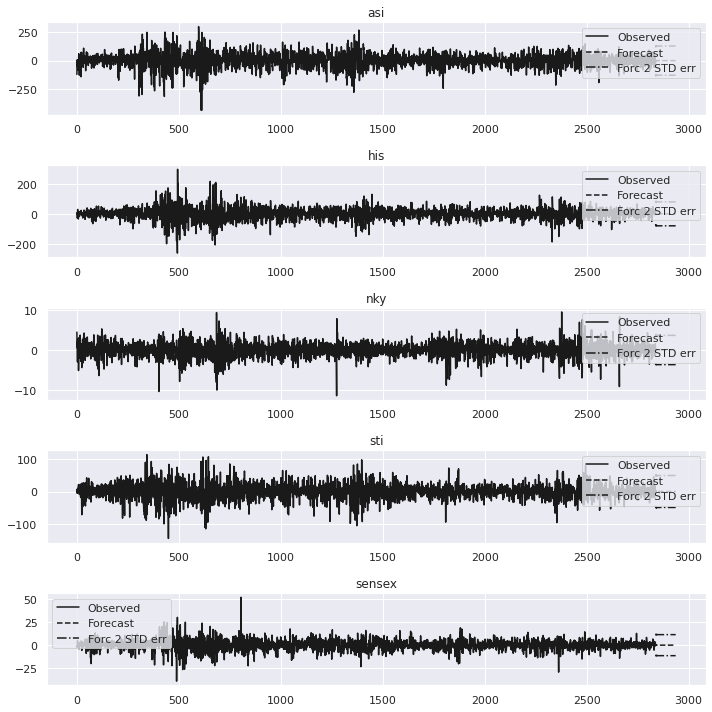

In [43]:
plt.figure(figsize=(12,8))
result.plot_forecast(100)
plt.legend(loc = "best")
plt.tight_layout(h_pad=1.5)
plt.show()

In [44]:
varfcast = result.forecast(mydatadiff.values, 100)


In [39]:
mydata.tail()

,asi,his,nky,sti,sensex
Date,,,,,
25-07-2020,4543.94,3419.74,180.95,2411.67,495.76
26-07-2020,4590.77,3438.82,179.62,2432.56,497.42
27-07-2020,4614.39,3438.96,178.75,2430.66,500.75
28-07-2020,4646.53,3448.72,178.78,2444.96,500.13
31-07-2020,4593.26,3474.12,180.38,2451.13,503.38


In [47]:
asivalues = pd.DataFrame(varfcast)[1]
asivalues

0     1.567376
1     5.563131
2    -2.298522
3     4.242340
4     2.726442
        ...   
95    0.512055
96    0.512055
97    0.512055
98    0.512055
99    0.512055
Name: 1, Length: 100, dtype: float64

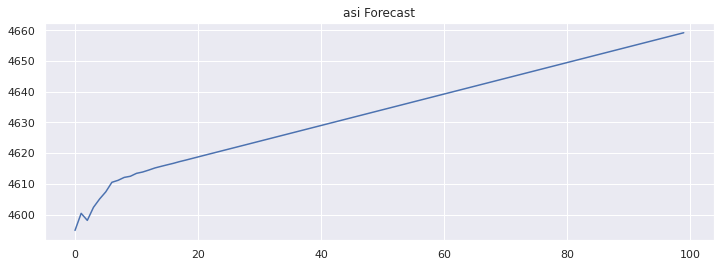

In [49]:
asi_level= np.cumsum(hisvalues) + 4593.26
plt.figure(figsize=(12,4))
plt.plot(asi_level)
plt.title("asi Forecast")
plt.grid
plt.show()

In [50]:
hisvalues = pd.DataFrame(varfcast)[2]
hisvalues

0    -0.171666
1     0.170434
2    -0.009216
3     0.238794
4    -0.030547
        ...   
95    0.012923
96    0.012923
97    0.012923
98    0.012923
99    0.012923
Name: 2, Length: 100, dtype: float64

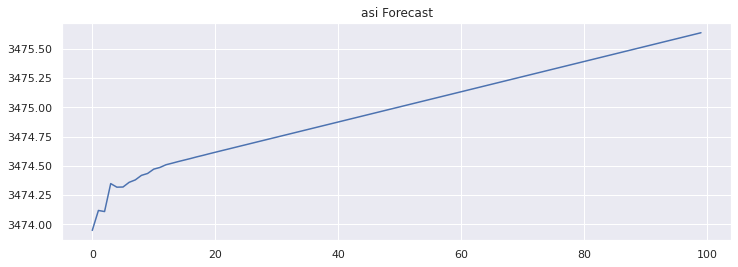

In [51]:
asi_level= np.cumsum(hisvalues) + 3474.12
plt.figure(figsize=(12,4))
plt.plot(asi_level)
plt.title("asi Forecast")
plt.grid
plt.show()